# Simple Linear Regression

## Finding the "Best" Line

A common "best line" choice for linear regression is ordinary least squares (OLS). In simple OLS regression, we assume that the relationship between two variables x and y can be modeled as:

y = mx + b + error

where error is loss function and calculated as:

<img src="09_loss_function_example.png" height="400" />

loss = (-1)^2 + (3)^2 = 1 + 9 = 10

For best line, we look for the lowest loss function.

## Fitting a Linear Regression Model in Python

Use OLS

Intercept        43.016014
hours_studied     9.848111
dtype: float64


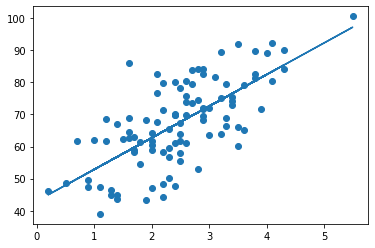

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt

students = pd.read_csv('09_students.csv')
model = sm.OLS.from_formula('score ~ hours_studied', data = students)
results = model.fit()

print(results.params)

plt.scatter(students.hours_studied, students.score)
plt.plot(students.hours_studied, results.params[1] * students.hours_studied + results.params[0])
plt.show()

Based on the above params, the linear regression prediction is:

score = 9.84 * hours_studied + 43.02

In [27]:
# Predict the score of student who studies for 5 hours:

print(results.params[1] * 5 + results.params[0])

# The same prediction, but use `predict` method:

print(results.predict({"hours_studied": [5]}))

92.25656916195146
0    92.256569
dtype: float64


## Assumptions of Linear Regression

* Linear, i.e. can draw a linear line through the points
* Normality
* Heteroscedasticity

In [28]:
# Fitted values (i.e. predicted values of the original dataset):

fitted_values = results.predict(students.hours_studied)

residuals = students.score - fitted_values

print(residuals.head(10))

0     3.894086
1     8.806731
2   -12.236291
3     5.827009
4    10.096631
5   -18.327425
6    13.866253
7    -0.857803
8   -19.051480
9    -2.993269
dtype: float64


## Normality assumption

The normality assumption states that the residuals should be normally distributed.

By plotting the histogram below, we can see that these residuals appear to be normally distributed.

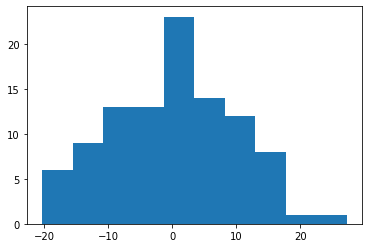

In [29]:
plt.hist(residuals)
plt.show()

## Homoscedasticity assumption

Homoscedasticity is a fancy way of saying that the residuals have equal variation across all values of the predictor variable. A common way to check this is by plotting the residuals against the fitted values.

If the homoscedasticity assumption is met, then this plot will look like a random splatter of points, centered around y=0 (as in the example below).

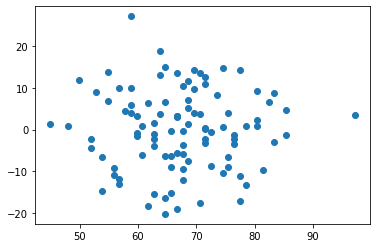

In [30]:
plt.scatter(fitted_values, residuals)
plt.show()

## Categorical Predictors

In the previous exercises, we used a quantitative predictor in our linear regression, but it’s important to note that we can also use categorical predictors. The simplest case of a categorical predictor is a binary variable (only two categories).

breakfast
0    61.664151
1    73.721277
Name: score, dtype: float64


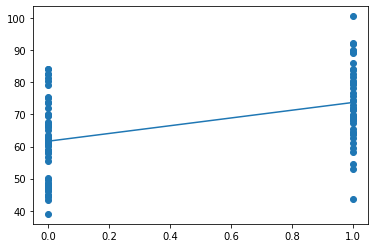

In [33]:
print(students.groupby('breakfast').mean().score)

plt.scatter(students.breakfast, students.score)

# Use the means to add line
plt.plot([0,1], [61.66415094339621, 73.7212765957447])

plt.show()

In [35]:
model = sm.OLS.from_formula('score ~ breakfast', students)
results = model.fit()
print(results.params)

Intercept    61.664151
breakfast    12.057126
dtype: float64


In [36]:
mean_score_no_breakfast = np.mean(students.score[students.breakfast == 0])
mean_score_breakfast = np.mean(students.score[students.breakfast == 1])

# Same as the slope!!!
print(mean_score_breakfast - mean_score_no_breakfast)

12.057125652348468
